<a href="https://colab.research.google.com/github/Hanhpt23/DeepLearning_FIT2023/blob/main/PReLU_activation_function_and_CiFar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Grandient Descent

**Problem**: Consider a single neuron with 3 inputs and PReLU activation function. Find the mathematical formula for the gradient of the activated output with respect to its incoming weights and the learnable PReLU parameter.

**Solution:**

A single neuron with 3 inputs and PReLU activation function can be difined in terms of

- Inputs:`x0, x1, x2, x3`
- Weights: `1, w1, w2, w3`
- PReLU parameter: `a` (learnable)

The output of the neuron before the activation function is given by:
$$
z = x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3
$$

Parametric Rectified Linear Unit (PReLU) activation function can be expressed as follows:
$$
y = f(z) = \begin{cases}
z & \text{if } z > 0 \\
a \cdot z & \text{otherwise}
\end{cases}
$$

The gradient of (PReLU) with respect to `w_1` can be expressed as follows:
$$
\frac{\partial y}{\partial w_1} = \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w_1} = \begin{cases}
x_1 & \text{if } z > 0 \\
a \cdot x_1 & \text{otherwise}
\end{cases}
$$

The gradient of (PReLU) with respect to `w_2` can be expressed as follows:
$$
\frac{\partial y}{\partial w_2} = \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w_2} = \begin{cases}
x_2 & \text{if } z > 0 \\
a \cdot x_2 & \text{otherwise}
\end{cases}
$$

The gradient of (PReLU) with respect to `w_3` can be expressed as follows:
$$
\frac{\partial y}{\partial w_3} = \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w_3} = \begin{cases}
x_3 & \text{if } z > 0 \\
a \cdot x_3 & \text{otherwise}
\end{cases}
$$

The gradient of (PReLU) with respect to `a` can be expressed as follows:
$$
\frac{\partial y}{\partial a} = \begin{cases}
0 & \text{if } z > 0 \\
x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 & \text{otherwise}
\end{cases}
$$

<!-- $$
\frac{df(Z)}{dZ} = \begin{cases}
1 & \text{if } x > 0 \\
a & \text{otherwise}
\end{cases}
$$ -->



#2. Building dense Neural Networks for CiFar10
**Problem**: Building a deep learning model using fully connected neural networks for CiFar10 classification.

**Solution:**

## Import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time

## Split the data into 60% training, 20% validation, and 20% testing with random_state = 1

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

random_state = 1
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=0.4, random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=random_state)

print(len(x_train), len(y_train), len(x_val), len(y_val), len(x_test), len(y_test))

170498071/170498071 [==============================] - 13s 0us/step
30000 30000 10000 10000 10000 10000


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Checking inputs and ground truths

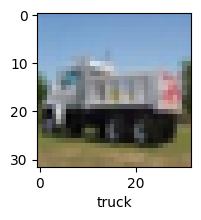

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])])

plot_sample(x_test, y_test, 2)

##Normalizing dataset

In [ ]:
# Convert pixel values to floats and scale to the range [0, 1]
X_train = x_train.astype('float32') / 255.0
X_val = x_val.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

print(X_train.max(), X_val.max(), X_test.max())

# Calculate the mean and standard deviation of the training data
mean = np.mean(X_train, axis=(0, 1, 2, 3))
std = np.std(X_train, axis=(0, 1, 2, 3))

# Standardize the data using the mean and standard deviation
X_train_norm = (X_train - mean) / (std + 1e-7)
X_val_norm = (X_val - mean) / (std + 1e-7)
X_test_norm = (X_test - mean) / (std + 1e-7)


1.0 1.0 1.0


In [ ]:
print(X_train_norm.max(), X_val_norm.max(), X_test_norm.max())

2.094039 2.094039 2.094039


## One-node Classifier

- Training Runtime: 394.98 seconds
- Test Loss: 1.7291
- Test Accuracy: 0.4082

In [ ]:
num_classes = 10  # 10-class problem
drop_rate = 0.5
# Define model
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.001

# Create an SGD optimizer instance with the desired learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model with callbacks
start_time = time.time()

history = model.fit(X_train_norm, y_train, epochs=500, batch_size=32, validation_data=(X_val_norm, y_val), callbacks=[checkpoint, early_stopping])

end_time = time.time()
# Calculate the training runtime
training_time = end_time - start_time
print(f"Training Runtime: {training_time:.2f} seconds")

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/500
935/938 [============================>.] - ETA: 0s - loss: 2.6642 - accuracy: 0.2227
Epoch 1: val_loss improved from inf to 1.91003, saving model to best_model.h5
938/938 [==============================] - 7s 7ms/step - loss: 2.6640 - accuracy: 0.2227 - val_loss: 1.9100 - val_accuracy: 0.3443
Epoch 2/500
935/938 [============================>.] - ETA: 0s - loss: 2.3950 - accuracy: 0.2698
Epoch 2: val_loss improved from 1.91003 to 1.85697, saving model to best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 2.3949 - accuracy: 0.2699 - val_loss: 1.8570 - val_accuracy: 0.3649
Epoch 3/500
927/938 [============================>.] - ETA: 0s - loss: 2.2933 - accuracy: 0.2833
Epoch 3: val_loss improved from 1.85697 to 1.81572, saving model to best_model.h5
938/938 [==============================] - 4s 4ms/step - loss: 2.2924 - accuracy: 0.2835 - val_loss: 1.8157 - val_accuracy: 0.3714
Epoch 4/500
931/938 [============================>.] - ETA: 0s - loss: 2.2

## Model 1 (Adding 2 Dense layers)

The one-node classifier models seems to have problem with the architecture, do not have enough neurons. Therefore, it should be better to try with a deeper architecture.

- Training Runtime: 263.42 seconds
- Test Loss: 2.9312
- Test Accuracy: 0.5384

In [ ]:
num_classes = 10  # 10-class problem
drop_rate = 0.5
# Define model
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.001

# Create an SGD optimizer instance with the desired learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Compile the model
# model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with callbacks
start_time = time.time()

history = model.fit(X_train_norm, y_train, epochs=50, batch_size=32, validation_data=(X_val_norm, y_val), callbacks=[checkpoint, early_stopping])

end_time = time.time()
# Calculate the training runtime
training_time = end_time - start_time
print(f"Training Runtime: {training_time:.2f} seconds")

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
927/938 [============================>.] - ETA: 0s - loss: 11.9153 - accuracy: 0.2502
Epoch 1: val_loss improved from inf to 11.46510, saving model to best_model.h5
938/938 [==============================] - 10s 5ms/step - loss: 11.9107 - accuracy: 0.2510 - val_loss: 11.4651 - val_accuracy: 0.3583
Epoch 2/50
 33/938 [>.............................] - ETA: 2s - loss: 11.5146 - accuracy: 0.3390

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


931/938 [============================>.] - ETA: 0s - loss: 11.3379 - accuracy: 0.3289
Epoch 2: val_loss improved from 11.46510 to 11.02216, saving model to best_model.h5
938/938 [==============================] - 4s 5ms/step - loss: 11.3356 - accuracy: 0.3293 - val_loss: 11.0222 - val_accuracy: 0.3876
Epoch 3/50
930/938 [============================>.] - ETA: 0s - loss: 10.9014 - accuracy: 0.3635
Epoch 3: val_loss improved from 11.02216 to 10.62951, saving model to best_model.h5
938/938 [==============================] - 4s 4ms/step - loss: 10.9000 - accuracy: 0.3638 - val_loss: 10.6295 - val_accuracy: 0.4065
Epoch 4/50
931/938 [============================>.] - ETA: 0s - loss: 10.5153 - accuracy: 0.3825
Epoch 4: val_loss improved from 10.62951 to 10.26842, saving model to best_model.h5
938/938 [==============================] - 4s 4ms/step - loss: 10.5141 - accuracy: 0.3827 - val_loss: 10.2684 - val_accuracy: 0.4191
Epoch 5/50
930/938 [============================>.] - ETA: 0s - loss:

## Model 2- Test architecture by adding one layer and dropout regulization

Continue testing the architecture because as the same reason as model 1

- Training Runtime: 853.75 seconds

- Test Loss: 1.6158

- Test Accuracy: 0.5649


In [ ]:
num_classes = 10  # 10-class problem
drop_rate = 0.5
# Define model
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.001

# Create an SGD optimizer instance with the desired learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model with callbacks
start_time = time.time()

history = model.fit(X_train_norm, y_train, epochs=500, batch_size=32, validation_data=(X_val_norm, y_val), callbacks=[checkpoint, early_stopping])

end_time = time.time()
# Calculate the training runtime
training_time = end_time - start_time
print(f"Training Runtime: {training_time:.2f} seconds")

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/500
933/938 [============================>.] - ETA: 0s - loss: 21.8620 - accuracy: 0.1862
Epoch 1: val_loss improved from inf to 21.25554, saving model to best_model.h5
938/938 [==============================] - 7s 6ms/step - loss: 21.8591 - accuracy: 0.1867 - val_loss: 21.2555 - val_accuracy: 0.2972
Epoch 2/500
924/938 [============================>.] - ETA: 0s - loss: 20.9453 - accuracy: 0.2582
Epoch 2: val_loss improved from 21.25554 to 20.44403, saving model to best_model.h5
938/938 [==============================] - 4s 5ms/step - loss: 20.9400 - accuracy: 0.2581 - val_loss: 20.4440 - val_accuracy: 0.3340
Epoch 3/500
932/938 [============================>.] - ETA: 0s - loss: 20.1643 - accuracy: 0.2960
Epoch 3: val_loss improved from 20.44403 to 19.69648, saving model to best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 20.1619 - accuracy: 0.2960 - val_loss: 19.6965 - val_accuracy: 0.3594
Epoch 4/500
926/938 [============================>.] - ETA: 

## Model 3. Test architecture of model 2 by adding one more layers and a dropout

- Training Runtime: 980.60 seconds
- Test Loss: 1.5925
- Test Accuracy: 0.5408

In [ ]:
num_classes = 10  # 10-class problem
drop_rate = 0.5
# Define model

model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.001

# Create an SGD optimizer instance with the desired learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model with callbacks
start_time = time.time()

history = model.fit(X_train_norm, y_train, epochs=500, batch_size=32, validation_data=(X_val_norm, y_val), callbacks=[checkpoint, early_stopping])

end_time = time.time()
# Calculate the training runtime
training_time = end_time - start_time
print(f"Training Runtime: {training_time:.2f} seconds")

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/500
936/938 [============================>.] - ETA: 0s - loss: 22.0466 - accuracy: 0.1153
Epoch 1: val_loss improved from inf to 21.50645, saving model to best_model.h5
938/938 [==============================] - 8s 6ms/step - loss: 22.0458 - accuracy: 0.1154 - val_loss: 21.5064 - val_accuracy: 0.1856
Epoch 2/500
931/938 [============================>.] - ETA: 0s - loss: 21.1727 - accuracy: 0.1354
Epoch 2: val_loss improved from 21.50645 to 20.74971, saving model to best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 21.1701 - accuracy: 0.1355 - val_loss: 20.7497 - val_accuracy: 0.2047
Epoch 3/500
935/938 [============================>.] - ETA: 0s - loss: 20.4357 - accuracy: 0.1519
Epoch 3: val_loss improved from 20.74971 to 20.02018, saving model to best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 20.4349 - accuracy: 0.1519 - val_loss: 20.0202 - val_accuracy: 0.2294
Epoch 4/500
931/938 [============================>.] - ETA: 

## Model 4

By now, we have been using the same parameters and changing only the architectures of the models. We realize that the `Model 2` is suitable for our problem, we we pick it up and use to tune parameters

In [ ]:
num_classes = 10  # 10-class problem
drop_rate = 0.5
# Define model
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(1000, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(100, kernel_initializer='lecun_normal', kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.0005

# Create an SGD optimizer instance with the desired learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model with callbacks
start_time = time.time()

history = model.fit(X_train_norm, y_train, epochs=500, batch_size=32, validation_data=(X_val_norm, y_val), callbacks=[checkpoint, early_stopping])

end_time = time.time()
# Calculate the training runtime
training_time = end_time - start_time
print(f"Training Runtime: {training_time:.2f} seconds")

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/500
932/938 [============================>.] - ETA: 0s - loss: 23.1208 - accuracy: 0.1564
Epoch 1: val_loss improved from inf to 22.67519, saving model to best_model.h5
938/938 [==============================] - 6s 5ms/step - loss: 23.1189 - accuracy: 0.1567 - val_loss: 22.6752 - val_accuracy: 0.2531
Epoch 2/500
 11/938 [..............................] - ETA: 4s - loss: 22.8029 - accuracy: 0.1932

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


925/938 [============================>.] - ETA: 0s - loss: 22.5489 - accuracy: 0.2197
Epoch 2: val_loss improved from 22.67519 to 22.20671, saving model to best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 22.5465 - accuracy: 0.2196 - val_loss: 22.2067 - val_accuracy: 0.2843
Epoch 3/500
933/938 [============================>.] - ETA: 0s - loss: 22.0889 - accuracy: 0.2498
Epoch 3: val_loss improved from 22.20671 to 21.77016, saving model to best_model.h5
938/938 [==============================] - 4s 5ms/step - loss: 22.0880 - accuracy: 0.2496 - val_loss: 21.7702 - val_accuracy: 0.3080
Epoch 4/500
929/938 [============================>.] - ETA: 0s - loss: 21.6634 - accuracy: 0.2705
Epoch 4: val_loss improved from 21.77016 to 21.35847, saving model to best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 21.6612 - accuracy: 0.2704 - val_loss: 21.3585 - val_accuracy: 0.3262
Epoch 5/500
929/938 [============================>.] - ETA: 0s - lo

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test_norm)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.60      0.59       956
           1       0.68      0.68      0.68      1021
           2       0.43      0.40      0.41       992
           3       0.39      0.37      0.38      1001
           4       0.46      0.54      0.50      1029
           5       0.49      0.40      0.44       996
           6       0.62      0.62      0.62      1020
           7       0.62      0.64      0.63      1007
           8       0.65      0.71      0.68       984
           9       0.65      0.60      0.63       994

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



In [ ]:
y_pred_classes[:10], y_test[:10].T

([1, 8, 9, 9, 1, 0, 3, 6, 4, 3],
 array([[1, 8, 9, 9, 1, 8, 5, 6, 4, 2]], dtype=uint8))

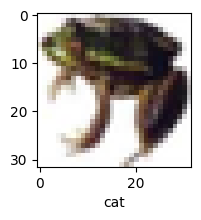

In [ ]:
plot_sample(x_test, y_pred_classes, 10)